# SmartCart Clusturing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv("smartcart_customers.csv")
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# DataPrepreocessing

In [3]:
data["Income"]=data["Income"].fillna(data["Income"].median())
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

In [4]:
#Feature Engineering
data["Age"]=2026-data["Year_Birth"]
data["Dt_Customer"]=pd.to_datetime(data["Dt_Customer"],dayfirst=True)
refrnce_dat=data["Dt_Customer"].max()
data["number_of_days"]=(refrnce_dat-data["Dt_Customer"]).dt.days

In [5]:
#Marketing
data["total_spent"]=data["MntWines"]+data["MntFruits"]+data["MntMeatProducts"]+data["MntFishProducts"]+data["MntSweetProducts"]+data["MntGoldProds"]
data["total_children"]=data["Kidhome"]+data["Teenhome"]

In [6]:
#Handel Education
data["Education"].value_counts()
data["EducationX"]=data["Education"].replace({
    "Basic":"Undergraduate",
    "2n Cycle":"Undergraduate",
    "Graduation":"Graduate",
    "PhD":"Postgraduate",
    "Master":"Postgraduate"
})

In [7]:
#Handel Marritial Status
data["Living_tog"]=data["Marital_Status"].replace({
    "Married":"Yes",
    "Together":"Yes",
    "Single":"No",
    "Divorced":"No",
    "Widow":"No","Alone":"No","Absurd":"No","YOLO":"No"
})

In [8]:
data["Living_tog"].value_counts()
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'number_of_days', 'total_spent',
       'total_children', 'EducationX', 'Living_tog'],
      dtype='object')

In [9]:
cols=['ID','Year_Birth','Education','Marital_Status','Kidhome','Teenhome','Dt_Customer','MntWines','MntFruits',
       'MntMeatProducts','MntFishProducts','MntSweetProducts',
       'MntGoldProds']

clean_data=data.drop(columns=cols)

<Axes: >

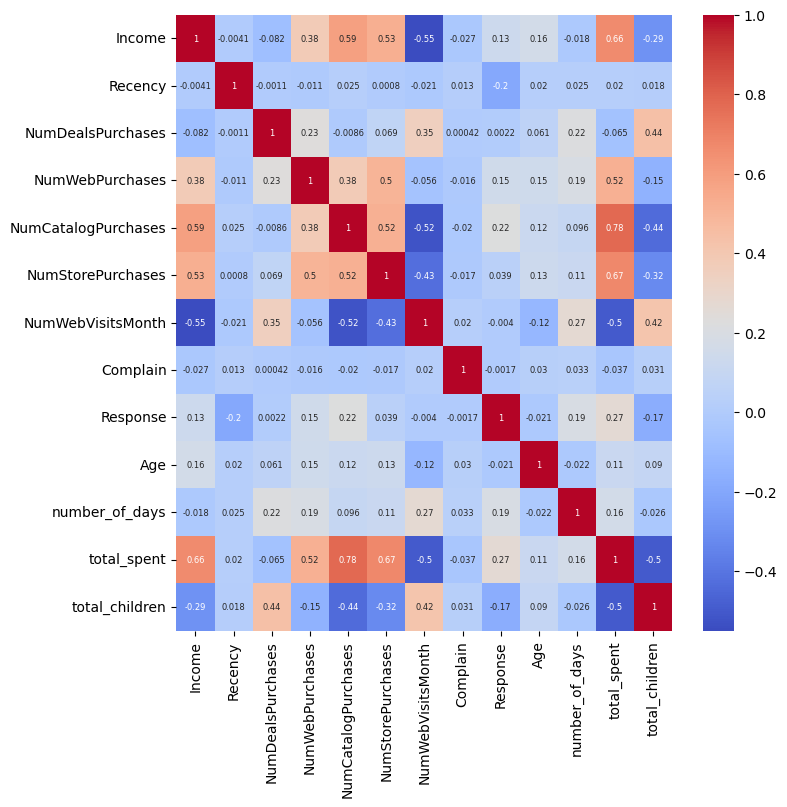

In [10]:
#Heat Map
plt.figure(figsize=(8,8))
cor=clean_data.corr(numeric_only=True)
sns.heatmap(
    cor,
    annot=True,
    annot_kws={"size":6},
    cmap="coolwarm"
)

In [11]:
clean_data.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,number_of_days,total_spent,total_children,EducationX,Living_tog
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Graduate,No
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Graduate,No
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Graduate,Yes
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Graduate,Yes
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Postgraduate,Yes


In [12]:
#Encoding
from sklearn.preprocessing import OneHotEncoder
cat_col=['Living_tog','EducationX']
ohe=OneHotEncoder()
enc_col=ohe.fit_transform(clean_data[cat_col])

In [13]:
enc_df=pd.DataFrame(enc_col.toarray(),columns=ohe.get_feature_names_out(cat_col),index=clean_data.index)

In [14]:
data_encoded=pd.concat([clean_data.drop(columns=cat_col),enc_df],axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=data_encoded
X_scale=scale.fit_transform(X)

In [16]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X_scale)

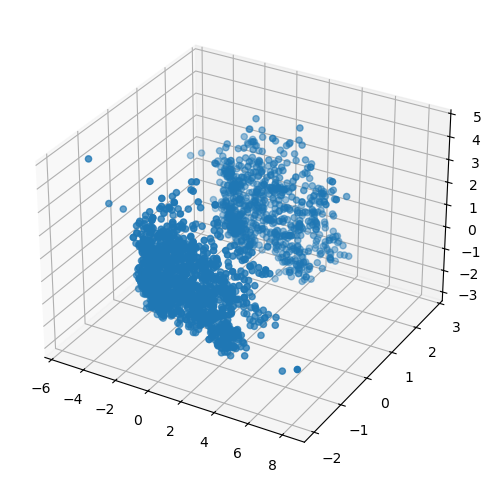

In [17]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2])

# Clusturing

In [22]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
wss=[]
for k in range(1,21):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit_transform(X_pca)
    wss.append(kmeans.inertia_)

In [32]:
knee = KneeLocator(
    range(1, 21),
    wss,
    curve="convex",
    direction="decreasing"
)
print("K=",knee.elbow)

K= 5


Text(0.5, 1.0, 'Elbow k Diagram')

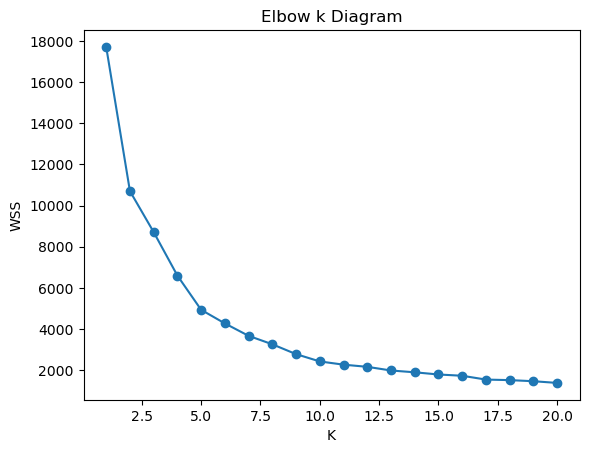

In [38]:
# plot
plt.plot(range(1,21), wss, marker='o')
plt.xlabel("K")
plt.ylabel("WSS")
plt.title("Elbow k Diagram")

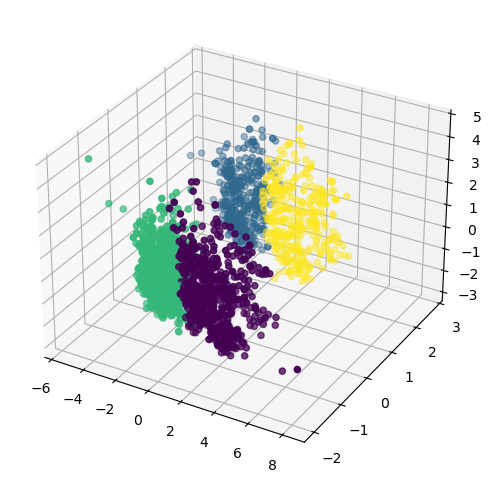

In [58]:
# Kmaens
model=KMeans(n_clusters=4)
res=model.fit_predict(X_pca)
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=res)


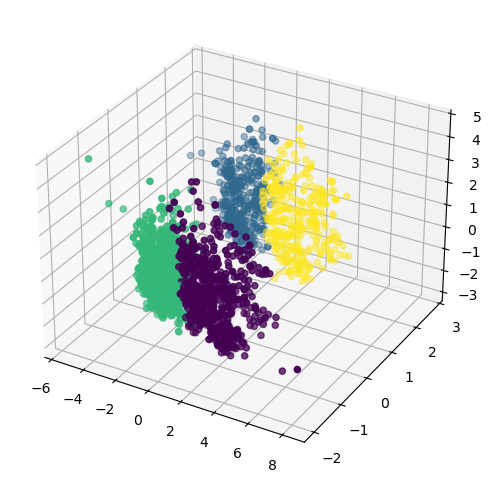

In [59]:
# Agglomaritive 
from sklearn.cluster import AgglomerativeClustering
model2=AgglomerativeClustering(n_clusters=4)
res_agg=model2.fit_predict(X_pca)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=res)

# Charecteriztion


In [67]:
X["clusters"]=res_agg
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,number_of_days,total_spent,total_children,Living_tog_No,Living_tog_Yes,EducationX_Graduate,EducationX_Postgraduate,EducationX_Undergraduate,clusters
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,1.0,0.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,1.0,0.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,0.0,1.0,1.0,0.0,0.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,0.0,1.0,1.0,0.0,0.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,1.0,0.0,0


C:\Users\rudra\AppData\Local\Temp\ipykernel_17124\717903451.py:2: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(x=X["clusters"],palette=ple,hue=X["clusters"])


<Axes: xlabel='clusters', ylabel='count'>

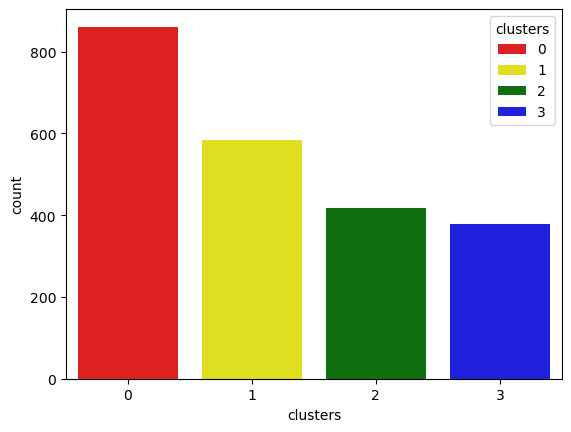

In [68]:
ple=["red","yellow","green","blue","black"]
sns.countplot(x=X["clusters"],palette=ple,hue=X["clusters"])

C:\Users\rudra\AppData\Local\Temp\ipykernel_17124\476772448.py:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=X["total_spent"],y=X["Income"],palette=ple,hue=X["clusters"])


(0.0, 160000.0)

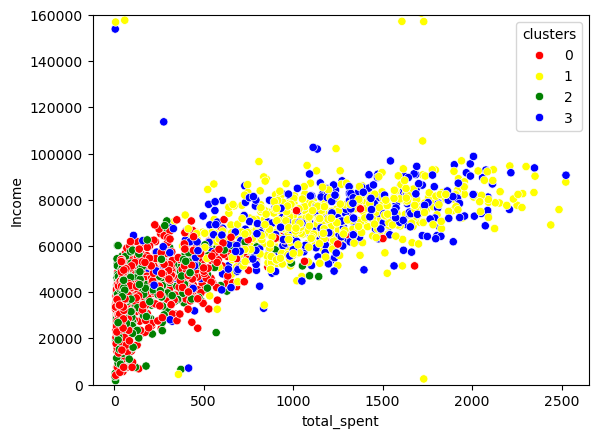

In [69]:
sns.scatterplot(x=X["total_spent"],y=X["Income"],palette=ple,hue=X["clusters"])
plt.ylim(0, 160000) 

In [71]:
#Cluster Summary
clus_sum=X.groupby("clusters").mean()
print(clus_sum)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
clusters                                                                
0         38591.904762  49.112660           2.614402         2.973287   
1         72606.704974  48.864494           1.996569         5.727273   
2         36539.742823  47.717703           2.583732         2.622010   
3         69264.850529  51.018519           1.886243         5.701058   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
clusters                                                                        
0                    0.854820           3.929152           6.456446  0.009292   
1                    5.289880           8.574614           3.648370  0.008576   
2                    0.803828           3.543062           6.631579  0.014354   
3                    4.780423           8.219577           3.838624  0.005291   

          Response        Age  number_of_days  total_spent  total_children